In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Global Variables
linespace = 1000 #Number of points to plot
a = 0 #Lower bound
b = np.pi #Upper Bound
n = [4,8,16,126,256,1024] #Number of rectangles
fmt = ".10f"  #number of decimal places to display

def f(x): #Function to integrate
    return np.sin(x)

def rectangular_left(f, a, b, n): #Left Riemann Sum
    h = (b - a) / n
    return format(sum(f(a + i*h) for i in range(n)) * h, fmt)

def rectangular_right(f, a, b, n): #Right Riemann Sum
    h = (b - a) / n
    return format(sum(f(a + i*h) for i in range(1, n+1)) * h, fmt)

def midpoint_rule(f, a, b, n): #Midpoint Rule
    h = (b - a) / n
    return format(sum(f(a + (i+0.5)*h) for i in range(n)) * h, fmt)

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b) + sum(2 * f(a + i*h) for i in range(1, n))
    return format((h / 2) * s, fmt)

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    s = f(a) + f(b) + sum(4 * f(a + i*h) for i in range(1, n, 2)) + sum(2 * f(a + i*h) for i in range(2, n, 2))
    return format((h / 3) * s, fmt)

def plot_rectangular_left(f, a, b, n, ax): #Plot Left Riemann Sum
    x = np.linspace(a, b, linespace)
    ax.plot(x, f(x), 'b')
    h = (b - a) / n
    for i in range(n):
        ax.bar(a + i*h, f(a + i*h), h, alpha=0.3, align='edge', color='red', edgecolor='red')
    ax.set_title("LRM N = "+ str(n))

def plot_rectangular_right(f, a, b, n, ax): #Plot Right Riemann Sum
    x = np.linspace(a, b, linespace)
    ax.plot(x, f(x), 'b')
    h = (b - a) / n
    for i in range(1, n+1):
        ax.bar(a + i*h, f(a + i*h), -h, alpha=0.3, align='edge', color='red', edgecolor='red')
    ax.set_title("RRM N = "+ str(n))

def plot_midpoint_rule(f, a, b, n, ax): #Plot Midpoint Rule
    x = np.linspace(a, b, linespace)
    ax.plot(x, f(x), 'b')
    h = (b - a) / n
    for i in range(n):
        ax.bar(a + (i+0.5)*h, f(a + (i+0.5)*h), h, alpha=0.3, align='center', color='red', edgecolor='red')
    ax.set_title("MR N = "+ str(n))

def plot_trapezoidal_rule(f, a, b, n, ax): #Plot Trapezoidal Rule
    x = np.linspace(a, b, linespace)
    ax.plot(x, f(x), 'b')
    x_trapezoids = np.linspace(a, b, n+1)
    for i in range(n):
        xs = [x_trapezoids[i], x_trapezoids[i], x_trapezoids[i+1], x_trapezoids[i+1]]
        ys = [0, f(x_trapezoids[i]), f(x_trapezoids[i+1]), 0]
        ax.fill(xs, ys, 'r', edgecolor='r', alpha=0.2)
    ax.set_title("TR N = "+ str(n))

def plot_simpsons_rule(f, a, b, n, ax): #Plot Simpson's Rule
    x = np.linspace(a, b, linespace)
    ax.plot(x, f(x), 'b')
    h = (b - a) / n
    x_intervals = np.linspace(a, b, n+1)
    for i in range(0, n, 2):
        x_points = np.linspace(x_intervals[i], x_intervals[i+2], 100)
        y_points = f(np.array([x_intervals[i], x_intervals[i]+h, x_intervals[i+2]]))
        coefficients = np.polyfit([x_intervals[i], x_intervals[i]+h, x_intervals[i+2]], y_points, 2)
        polynomial = np.poly1d(coefficients)
        ax.plot(x_points, polynomial(x_points), 'r')
        ax.fill_between(x_points, polynomial(x_points), color='red', alpha=0.2)
    ax.set_title("SR N = "+ str(n))


headers = ["N", "Left Riemann Sum", "Right Riemann Sum", "Midpoint Rule", "Trapezoidal Rule", "Simposon's Rule"]

In [180]:
df = pd.DataFrame(columns=headers)
df["N"] = n
df["Left Riemann Sum"] = [rectangular_left(f,a,b,n[i]) for i in range(len(n))]
df["Right Riemann Sum"] = [rectangular_right(f,a,b,n[i]) for i in range(len(n))]
df["Midpoint Rule"] = [midpoint_rule(f,a,b,n[i]) for i in range(len(n))]
df["Trapezoidal Rule"] = [trapezoidal_rule(f,a,b,n[i]) for i in range(len(n))]
df["Simposon's Rule"] = [simpsons_rule(f,a,b,n[i]) for i in range(len(n))]

df

,N,Left Riemann Sum,Right Riemann Sum,Midpoint Rule,Trapezoidal Rule,Simposon's Rule
0,4,1.8961188979,1.8961188979,2.0523443060,1.8961188979,2.0045597550
1,8,1.9742316019,1.9742316019,2.0129090856,1.9742316019,2.0002691699
2,16,1.9935703438,1.9935703438,2.0032163782,1.9935703438,2.0000165910
3,126,1.9998963876,1.9998963876,2.0000518066,1.9998963876,2.0000000043
4,256,1.9999749002,1.9999749002,2.0000125499,1.9999749002,2.0000000003
5,1024,1.9999984313,1.9999984313,2.0000007844,1.9999984313,2.0000000000


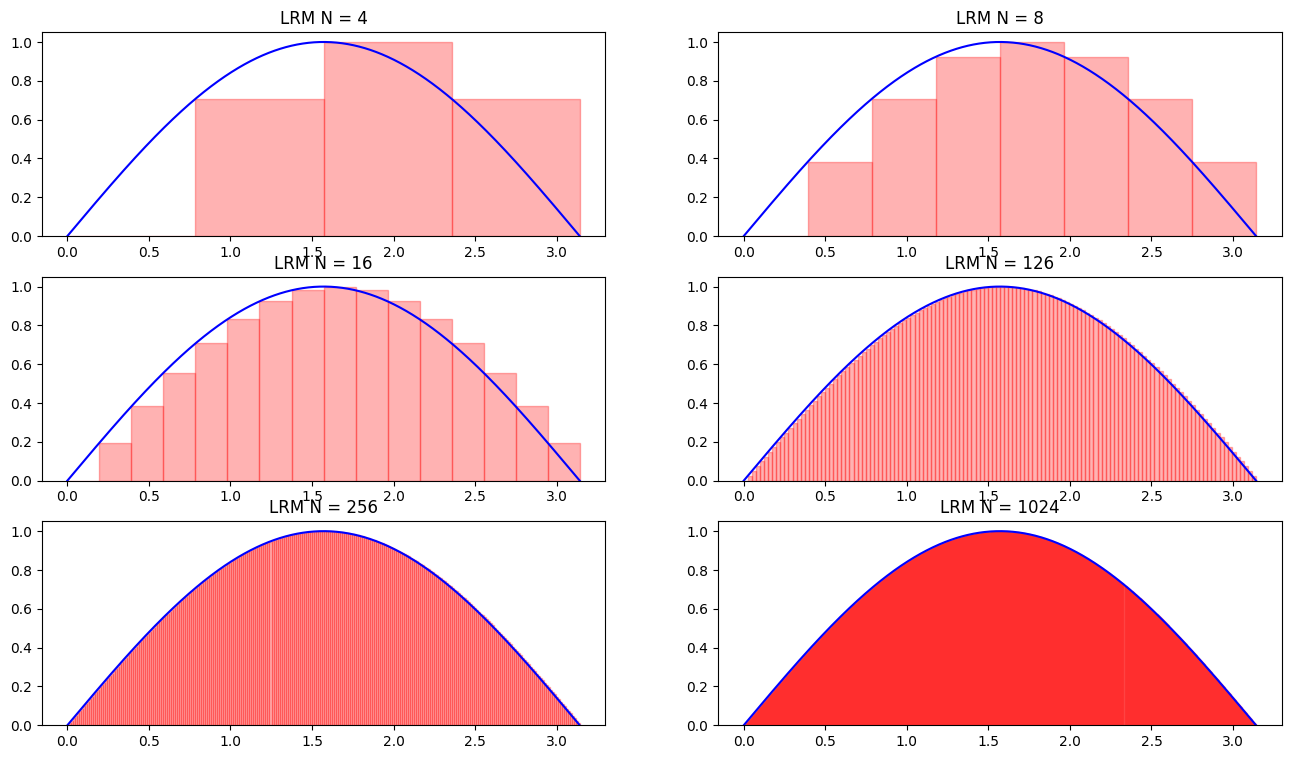

In [181]:
fig, ax = plt.subplots(3, 2, figsize=(16,9))
j = 0
for row in range(3):
    for col in range(2):
        plot_rectangular_left(f,a,b,n[j],ax[row,col])
        j += 1

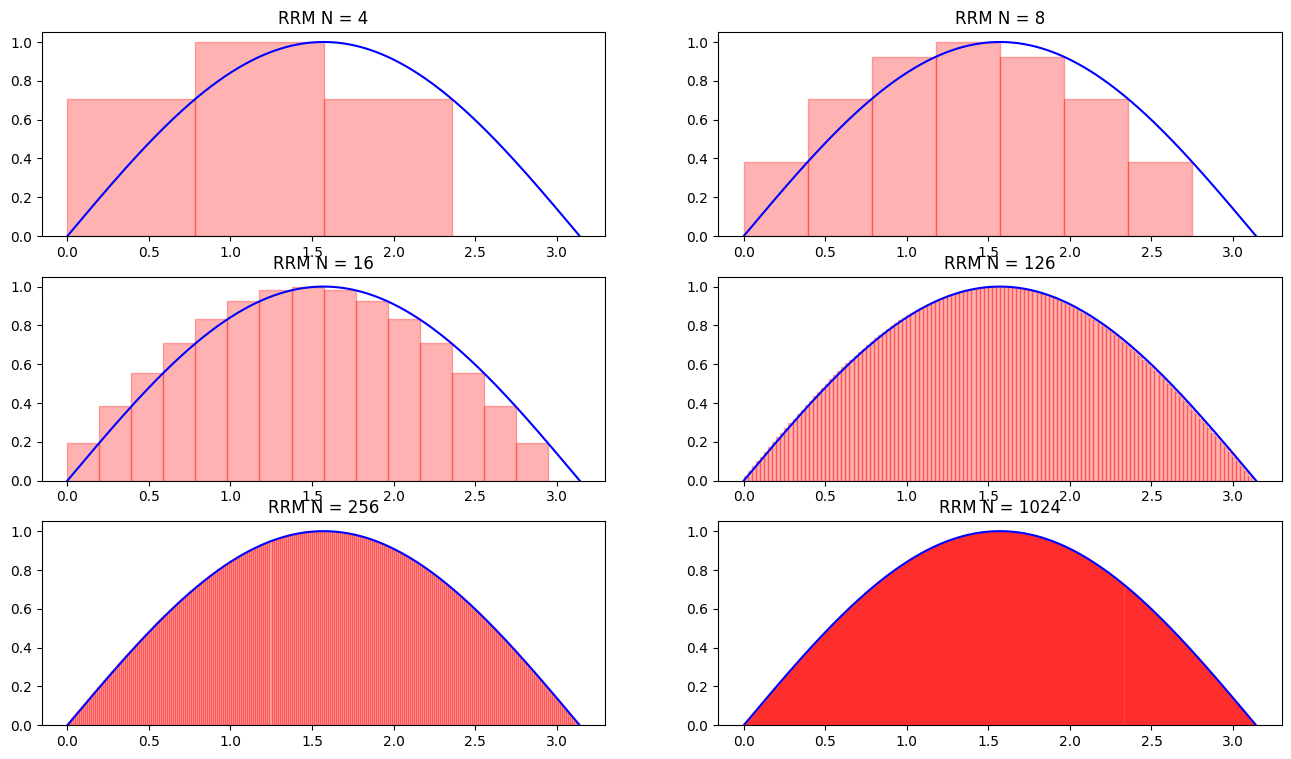

In [182]:
fig, ax = plt.subplots(3, 2, figsize=(16,9))
j = 0
for row in range(3):
    for col in range(2):
        plot_rectangular_right(f,a,b,n[j],ax[row,col])
        j += 1

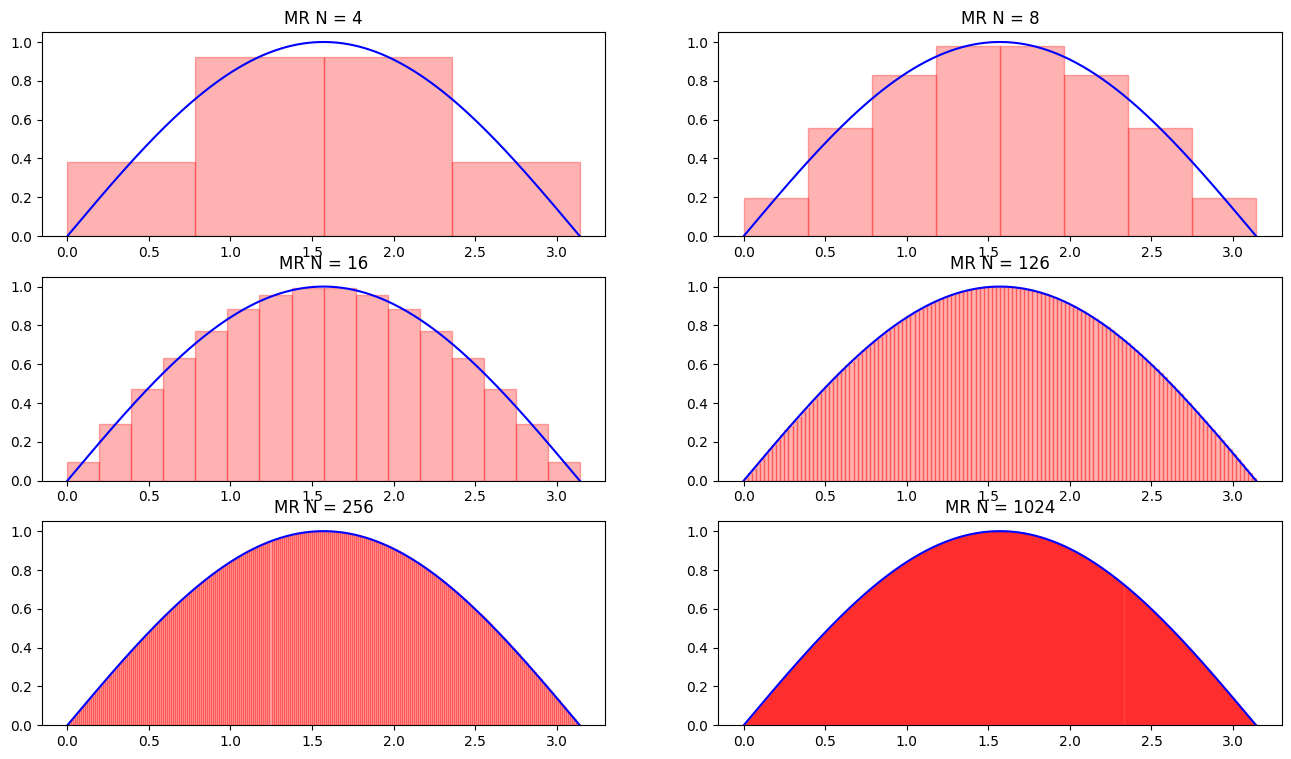

In [183]:
fig, ax = plt.subplots(3, 2, figsize=(16,9))
j = 0
for row in range(3):
    for col in range(2):
        plot_midpoint_rule(f,a,b,n[j],ax[row,col])
        j += 1

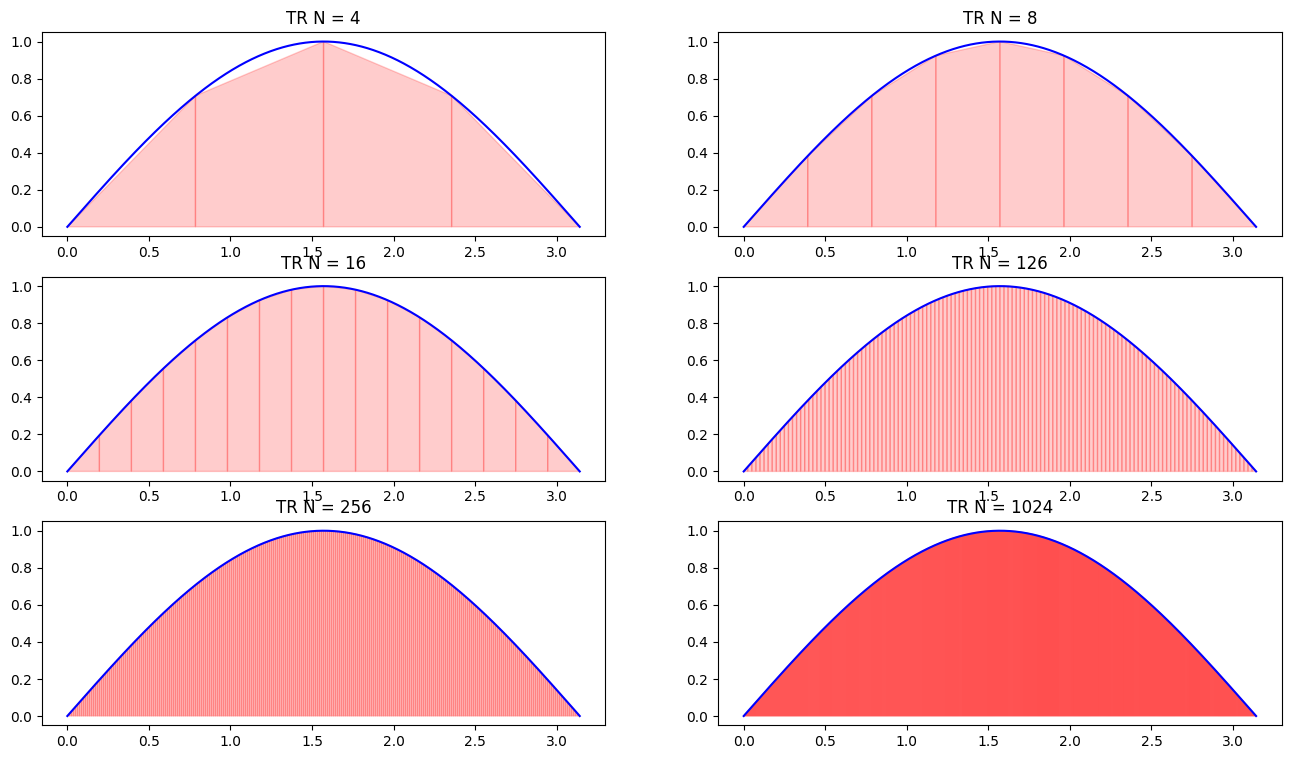

In [184]:
fig, ax = plt.subplots(3, 2, figsize=(16,9))
j = 0
for row in range(3):
    for col in range(2):
        plot_trapezoidal_rule(f,a,b,n[j],ax[row,col])
        j += 1

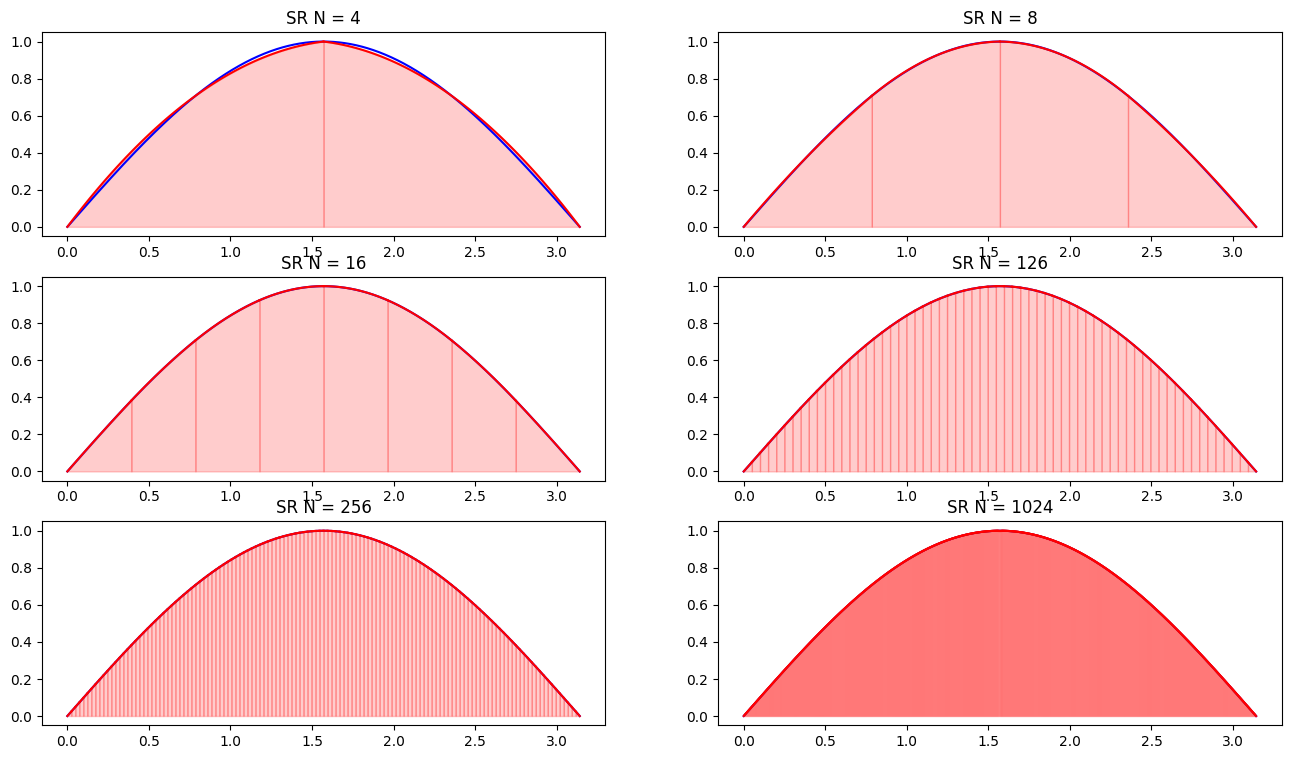

In [185]:
fig, ax = plt.subplots(3, 2, figsize=(16,9))
j = 0
for row in range(3):
    for col in range(2):
        plot_simpsons_rule(f,a,b,n[j],ax[row,col])
        j += 1